In [1]:
import sys
import os

cur_dir = os.getcwd()
dataset_path = os.path.join(cur_dir, "../Dataset")
script_path = os.path.join(cur_dir, "../Scripts")
print(script_path)
sys.path.append(dataset_path)
sys.path.append(script_path)

d:\УЧЕБА\Remote monitoring\Scripts\../Scripts


## Импортируем нужные скрипты


In [44]:
from importlib import reload
import ECGsignal as ecg

reload(ecg)

ecg.init()

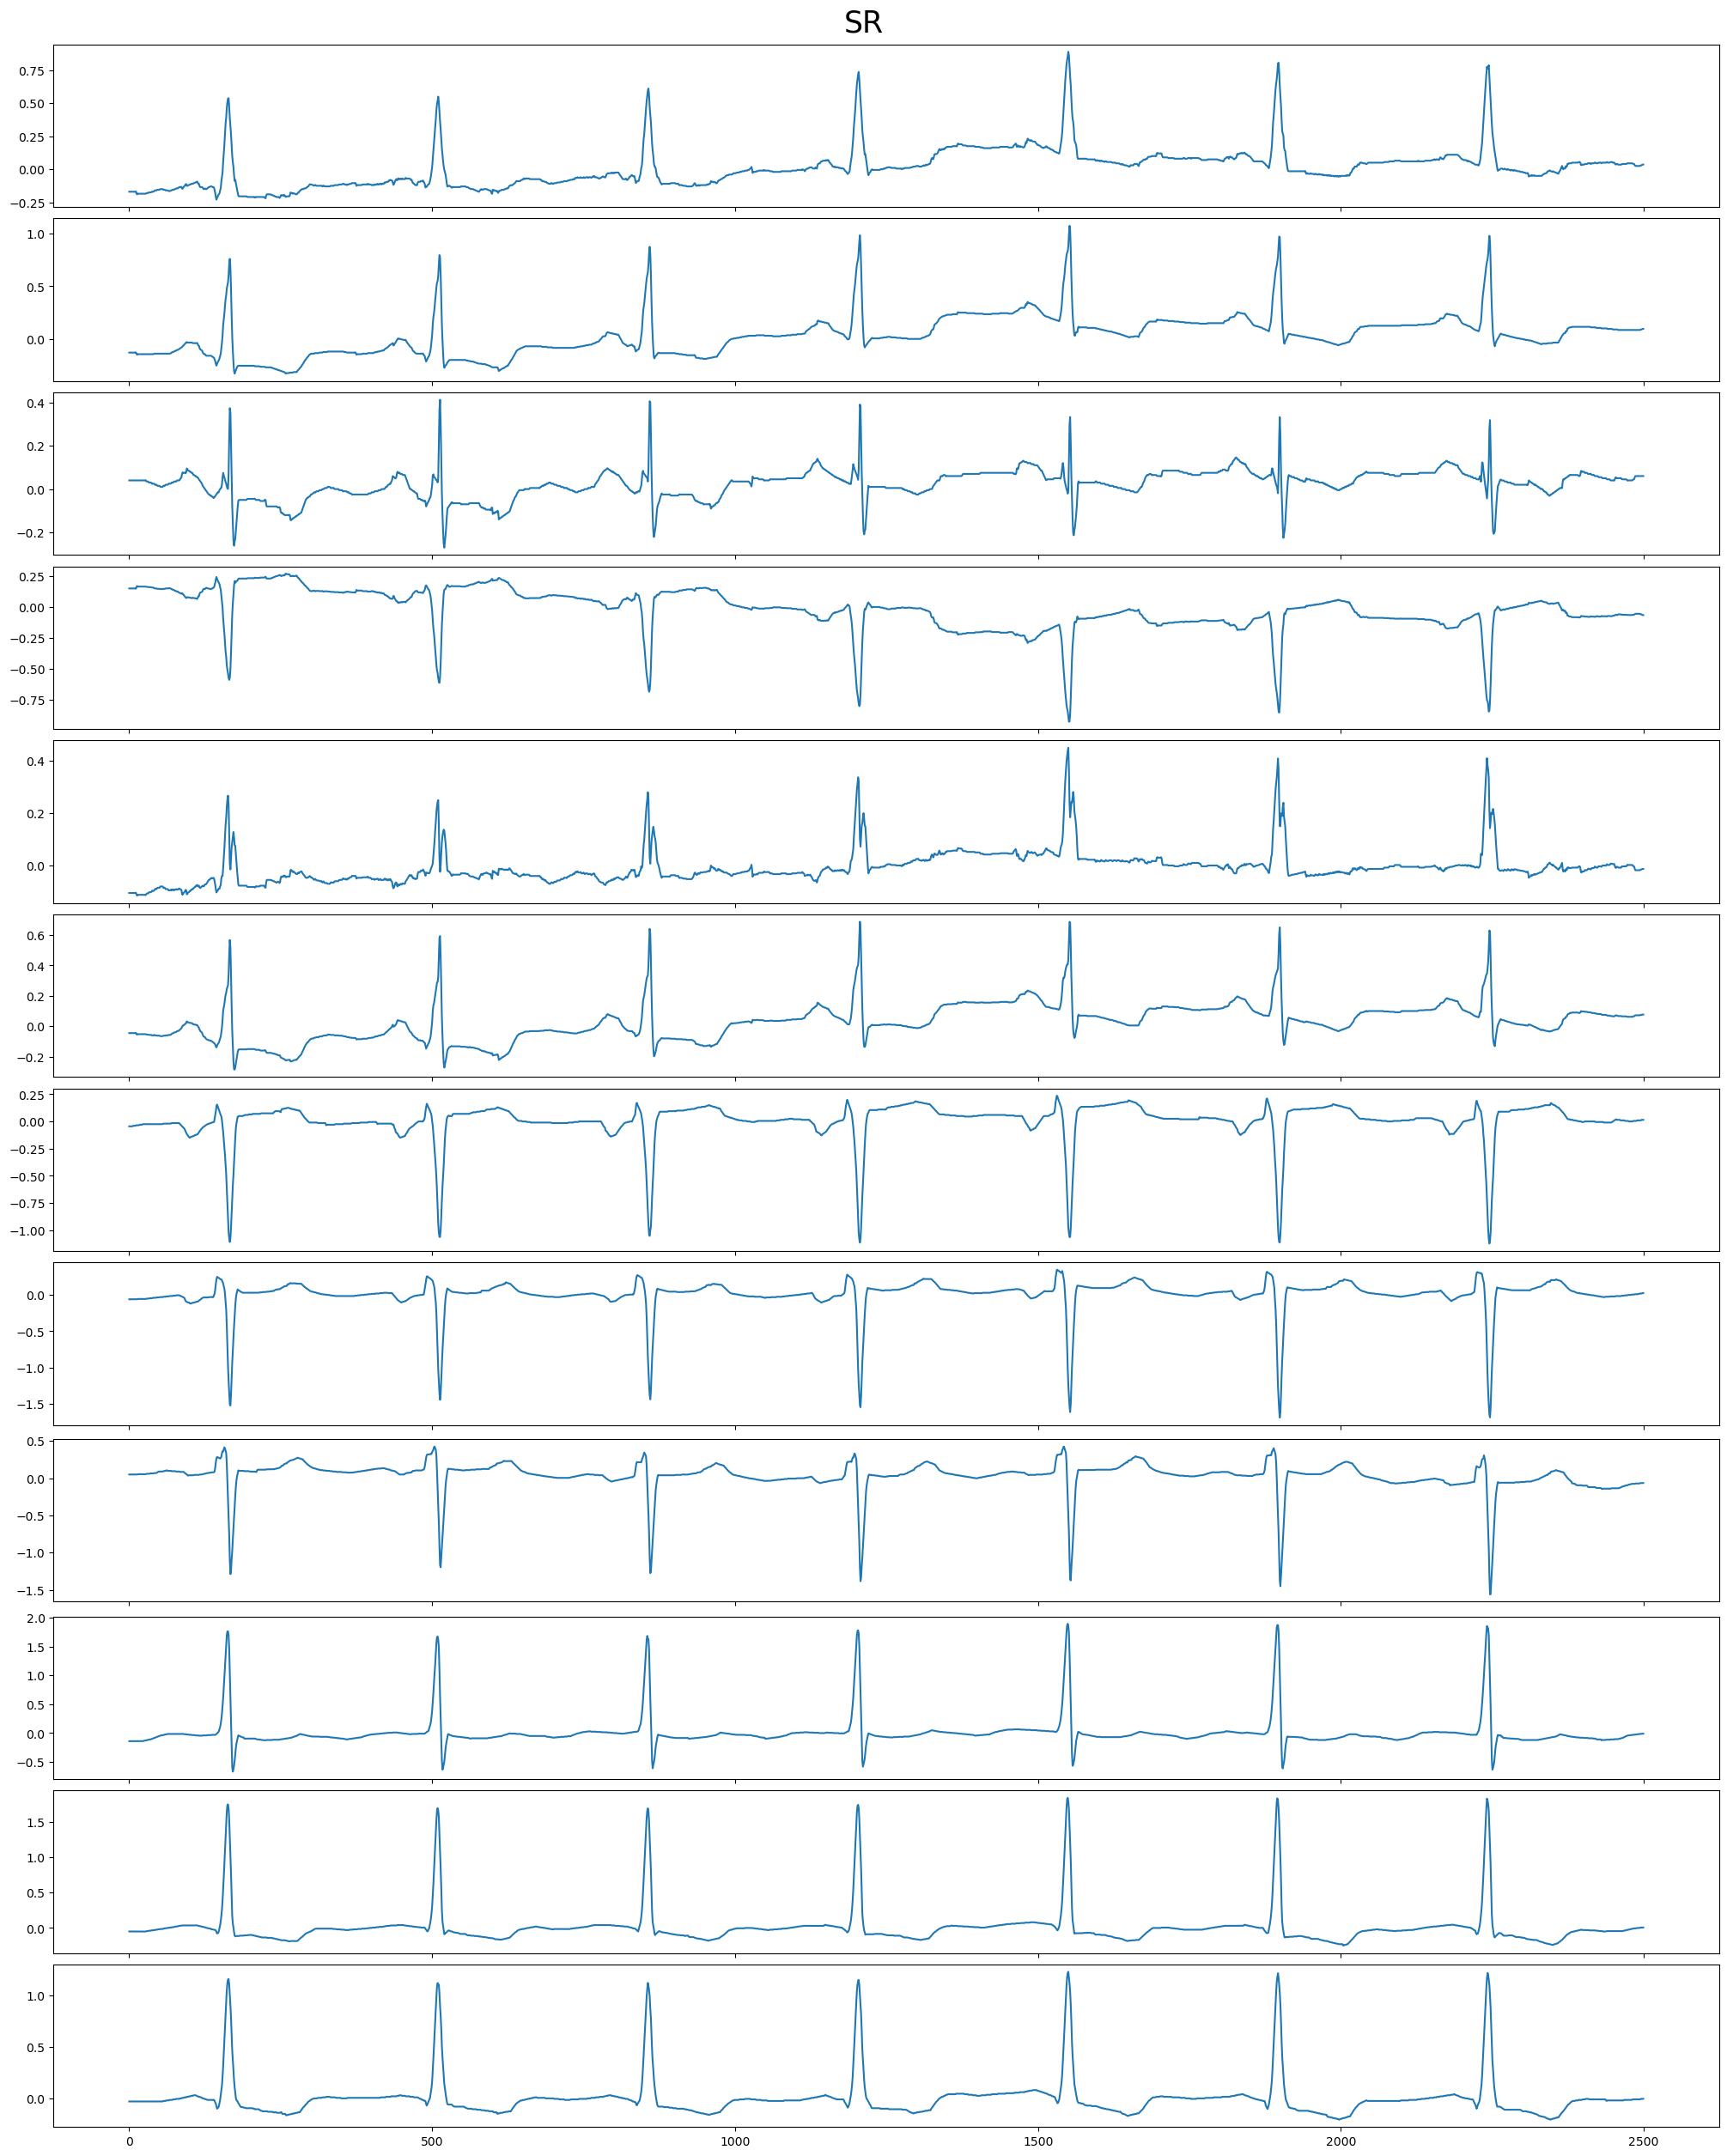

In [3]:
test_ecg = ecg.signal(2)
ecg.plot_signal(2)

In [35]:
import VECG as vecg

reload(vecg) #Это для отображения изменений в файле без прерывания ядра

vecg.init(filtering=True, canc_showing=True, plot3D=False)

In [41]:
XY, YZ, ZX = vecg.make_vecg(test_ecg, 0, 1)
print(XY.dtype)

            x         y         z
163 -1.267029  0.506926 -0.750032
164 -1.241024  0.583249 -0.901099
165 -1.104744  0.707489 -1.028472
166 -0.878513  0.796897 -1.167806
167 -0.649434  0.746466 -1.191621
uint8


In [48]:
M = ecg.return_signal(2)